In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import requests
import os
import glob
import numpy as np 

In [12]:
geo_df = gpd.read_file("https://gist.githubusercontent.com/walkerke/76cb8cc5f949432f9555/raw/363c297ce82a4dcb9bdf003d82aa4f64bc695cf1/mx.geojson")
geo_df.head()

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908..."
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774..."
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028..."
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ..."
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ..."


In [13]:
#plt.grid()
#geo_df.plot()

In [14]:
data_path = os.getcwd()+ '/Data/Temp/2019/'
db_data_path = data_path 
os.listdir()
print(os.listdir(db_data_path))

['201901010000TMed.csv', '201902010000TMed.csv', '201903010000TMed.csv', '201905010000TMed.csv', '201906010000TMed.csv', '201907010000TMed.csv', '201908010000TMed.csv', '201909010000TMed.csv', '201910010000TMed.csv', '201911010000TMed.csv']


In [15]:
path = os.getcwd()+ '/Data/Temp/2019/'
all_files = glob.glob(path+'*.csv')
all_files

['C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2019\\201901010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2019\\201902010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2019\\201903010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2019\\201905010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2019\\201906010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2019\\201907010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2019\\201908010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2019\\201909010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2019\\201910010000TMed.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS/Data/Temp/2019\\201911010000TMed.csv']

In [17]:
#dfPrueba=[df1,df2]
li = []
TMed = ['TMed201901','TMed201902','TMed201903','TMed201905','TMed201906','TMed201907','TMed201908','TMed201909',
        'TMed201910','TMed201911' ]

In [18]:
for i in range(len(TMed)):
    df = pd.read_csv(all_files[i], encoding='latin-1')
    df = df.rename(columns={'Tmed':TMed[i]})
    li.append(df)
    
li[0].head()

,Lon,Lat,Clave,Edo,Est,TMed201901
0,-99.75,16.76,76805,GRO,ACAPULCO,27.441935
1,-111.83,30.71,76113,SON,ALTAR,13.462069
2,-93.90,16.24,76840,CHIS,ARRIAGA,28.088710
3,-90.50,19.83,76695,CAMP,CAMPECHE,23.374074
4,-111.65,25.01,76402,BCS,CD. CONSTITUCIÓN,17.987097


In [20]:
d1=li[0]
d2=li[1]
d3=li[2]
#d4=li[3]
d5=li[3]
d6=li[4]
d7=li[5]
d8=li[6]
d9=li[7]
d10=li[8]
d11=li[9]
#d12=li[11]
#len(d1),len(d2)

In [23]:
df_outer = pd.merge(d1,d2,
              on=['Clave','Lon','Lat','Est','Edo'], how='outer')

df_outer = pd.merge(df_outer , d3, on=['Clave','Lon','Lat','Est','Edo'], how='outer')

#pd.concat(li,axis=0,ignore_index=True)
df_outer.head()

,Lon,Lat,Clave,Edo,Est,TMed201901,TMed201902,TMed201903
0,-99.75,16.76,76805,GRO,ACAPULCO,27.441935,26.735714,27.750000
1,-111.83,30.71,76113,SON,ALTAR,13.462069,12.904167,17.355357
2,-93.90,16.24,76840,CHIS,ARRIAGA,28.088710,28.871429,29.214516
3,-90.50,19.83,76695,CAMP,CAMPECHE,23.374074,27.514815,27.670968
4,-111.65,25.01,76402,BCS,CD. CONSTITUCIÓN,17.987097,17.796429,20.051613


In [26]:
from functools import reduce
dfl=[d1,d2,d3,d5,d6,d7,d8,d9,d10,d11]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Clave','Lon','Lat','Est','Edo'],
                                            how='outer'), dfl)

df_merged

,Lon,Lat,Clave,Edo,Est,TMed201901,TMed201902,TMed201903,TMed201905,TMed201906,TMed201907,TMed201908,TMed201909,TMed201910,TMed201911
0,-99.75,16.76,76805,GRO,ACAPULCO,27.441935,26.735714,27.750000,28.364516,30.406667,30.051613,NaN,NaN,NaN,NaN
1,-111.83,30.71,76113,SON,ALTAR,13.462069,12.904167,17.355357,21.933871,29.559615,32.822581,NaN,NaN,NaN,NaN
2,-93.90,16.24,76840,CHIS,ARRIAGA,28.088710,28.871429,29.214516,30.079310,28.553333,30.074194,NaN,NaN,NaN,NaN
3,-90.50,19.83,76695,CAMP,CAMPECHE,23.374074,27.514815,27.670968,32.125806,30.536207,29.564516,NaN,NaN,NaN,NaN
4,-111.65,25.01,76402,BCS,CD. CONSTITUCIÓN,17.987097,17.796429,20.051613,20.358065,24.136667,28.896774,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,-111.36,28.79,ELBERVANO,SON,El Bervano Son. INIFAP*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.4
1620,-114.81,32.43,MOCTEZUMA,SON,Moctezuma Son. INIFAP*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.6
1621,-96.10,18.19,CDALEMAN,VER,Ciudad Alemán Ver.*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.2
1622,-89.29,21.09,MTOYC,YUC,Motul Yuc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.6


In [27]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 0 to 1623
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Lon         1624 non-null   float64
 1   Lat         1624 non-null   float64
 2   Clave       1624 non-null   object 
 3   Edo         1624 non-null   object 
 4   Est         1624 non-null   object 
 5   TMed201901  635 non-null    float64
 6   TMed201902  1062 non-null   float64
 7   TMed201903  1087 non-null   float64
 8   TMed201905  1039 non-null   float64
 9   TMed201906  1066 non-null   float64
 10  TMed201907  1094 non-null   float64
 11  TMed201908  1262 non-null   float64
 12  TMed201909  1267 non-null   float64
 13  TMed201910  1197 non-null   float64
 14  TMed201911  1292 non-null   float64
dtypes: float64(12), object(3)
memory usage: 203.0+ KB


In [28]:
cols = ["TMed201901","TMed201902","TMed201903","TMed201905","TMed201906","TMed201907","TMed201908",
       "TMed201909","TMed201910","TMed201911"]
df_merged['TMed'] = df_merged[cols].mean(axis=1)
df_merged

,Lon,Lat,Clave,Edo,Est,TMed201901,TMed201902,TMed201903,TMed201905,TMed201906,TMed201907,TMed201908,TMed201909,TMed201910,TMed201911,TMed
0,-99.75,16.76,76805,GRO,ACAPULCO,27.441935,26.735714,27.750000,28.364516,30.406667,30.051613,NaN,NaN,NaN,NaN,28.458408
1,-111.83,30.71,76113,SON,ALTAR,13.462069,12.904167,17.355357,21.933871,29.559615,32.822581,NaN,NaN,NaN,NaN,21.339610
2,-93.90,16.24,76840,CHIS,ARRIAGA,28.088710,28.871429,29.214516,30.079310,28.553333,30.074194,NaN,NaN,NaN,NaN,29.146915
3,-90.50,19.83,76695,CAMP,CAMPECHE,23.374074,27.514815,27.670968,32.125806,30.536207,29.564516,NaN,NaN,NaN,NaN,28.464398
4,-111.65,25.01,76402,BCS,CD. CONSTITUCIÓN,17.987097,17.796429,20.051613,20.358065,24.136667,28.896774,NaN,NaN,NaN,NaN,21.537774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,-111.36,28.79,ELBERVANO,SON,El Bervano Son. INIFAP*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.4,21.400000
1620,-114.81,32.43,MOCTEZUMA,SON,Moctezuma Son. INIFAP*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.6,17.600000
1621,-96.10,18.19,CDALEMAN,VER,Ciudad Alemán Ver.*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.2,25.200000
1622,-89.29,21.09,MTOYC,YUC,Motul Yuc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.6,25.600000


In [29]:
geo_df1 = gpd.GeoDataFrame(df_merged, geometry=gpd.points_from_xy(df_merged.Lon, df_merged.Lat), crs="EPSG:4326")
geo_df1

,Lon,Lat,Clave,Edo,Est,TMed201901,TMed201902,TMed201903,TMed201905,TMed201906,TMed201907,TMed201908,TMed201909,TMed201910,TMed201911,TMed,geometry
0,-99.75,16.76,76805,GRO,ACAPULCO,27.441935,26.735714,27.750000,28.364516,30.406667,30.051613,NaN,NaN,NaN,NaN,28.458408,POINT (-99.75000 16.76000)
1,-111.83,30.71,76113,SON,ALTAR,13.462069,12.904167,17.355357,21.933871,29.559615,32.822581,NaN,NaN,NaN,NaN,21.339610,POINT (-111.83000 30.71000)
2,-93.90,16.24,76840,CHIS,ARRIAGA,28.088710,28.871429,29.214516,30.079310,28.553333,30.074194,NaN,NaN,NaN,NaN,29.146915,POINT (-93.90000 16.24000)
3,-90.50,19.83,76695,CAMP,CAMPECHE,23.374074,27.514815,27.670968,32.125806,30.536207,29.564516,NaN,NaN,NaN,NaN,28.464398,POINT (-90.50000 19.83000)
4,-111.65,25.01,76402,BCS,CD. CONSTITUCIÓN,17.987097,17.796429,20.051613,20.358065,24.136667,28.896774,NaN,NaN,NaN,NaN,21.537774,POINT (-111.65000 25.01000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,-111.36,28.79,ELBERVANO,SON,El Bervano Son. INIFAP*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.4,21.400000,POINT (-111.36000 28.79000)
1620,-114.81,32.43,MOCTEZUMA,SON,Moctezuma Son. INIFAP*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.6,17.600000,POINT (-114.81000 32.43000)
1621,-96.10,18.19,CDALEMAN,VER,Ciudad Alemán Ver.*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.2,25.200000,POINT (-96.10000 18.19000)
1622,-89.29,21.09,MTOYC,YUC,Motul Yuc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.6,25.600000,POINT (-89.29000 21.09000)


In [30]:
intersect = gpd.overlay(geo_df1, geo_df, how='intersection')
intersect

,Lon,Lat,Clave,Edo,Est,TMed201901,TMed201902,TMed201903,TMed201905,TMed201906,...,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry
0,-99.75,16.76,76805,GRO,ACAPULCO,27.441935,26.735714,27.750000,28.364516,30.406667,...,12,Guerrero,Guerrero,23.1,25.31,18.32,55.32,41.28,1.05,POINT (-99.75000 16.76000)
1,-98.50,16.66,QTZGR,GRO,Quetzala Gro.,25.274194,25.125000,26.568966,27.336957,28.357143,...,12,Guerrero,Guerrero,23.1,25.31,18.32,55.32,41.28,1.05,POINT (-98.50000 16.66000)
2,-99.93,17.60,YXTGR,GRO,Yextla Gro.,17.370968,20.040000,21.822581,23.722222,23.804348,...,12,Guerrero,Guerrero,23.1,25.31,18.32,55.32,41.28,1.05,POINT (-99.93000 17.60000)
3,-98.43,16.68,OMEGR,GRO,Ometepec Gro.,20.516129,20.464286,21.112903,21.435484,21.800000,...,12,Guerrero,Guerrero,23.1,25.31,18.32,55.32,41.28,1.05,POINT (-98.43000 16.68000)
4,-99.75,16.76,ACUGR,GRO,Acapulco Gro. SMN*,26.004839,25.661111,26.934000,27.946774,29.373214,...,12,Guerrero,Guerrero,23.1,25.31,18.32,55.32,41.28,1.05,POINT (-99.75000 16.76000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,-93.33,18.42,PARAISO,TAB,Paraíso Tab. SMN*,NaN,NaN,NaN,NaN,NaN,...,27,Tabasco,Tabasco,4.2,17.95,19.39,60.89,107.34,1.77,POINT (-93.33000 18.42000)
1591,-92.65,18.51,FRONTERA,TAB,Frontera Tres Brazos Tab. SGT*,NaN,NaN,NaN,NaN,NaN,...,27,Tabasco,Tabasco,4.2,17.95,19.39,60.89,107.34,1.77,POINT (-92.65000 18.51000)
1592,-93.62,18.18,POBLADOC11,TAB,Poblado C11 Tab. SGT*,NaN,NaN,NaN,NaN,NaN,...,27,Tabasco,Tabasco,4.2,17.95,19.39,60.89,107.34,1.77,POINT (-93.62000 18.18000)
1593,-92.93,17.98,76743,TAB,Villahermosa,NaN,NaN,NaN,NaN,NaN,...,27,Tabasco,Tabasco,4.2,17.95,19.39,60.89,107.34,1.77,POINT (-92.93000 17.98000)


In [31]:
grouped = intersect.groupby(['id','state'])['TMed'].agg('mean')
grouped.head()

id  state              
1   Aguascalientes         19.301802
2   Baja California        21.793272
3   Baja California Sur    25.666163
4   Campeche               28.002745
5   Chiapas                25.510474
Name: TMed, dtype: float64

In [39]:
merge = pd.merge(geo_df, grouped, on="id")
merge = merge.rename(columns={'TMed': 'TMed19'})
merge.head()

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry,TMed19
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908...",19.301802
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774...",21.793272
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028...",25.666163
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ...",28.002745
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ...",25.510474


In [36]:
merge['TMed19'].max()

29.086470371894734

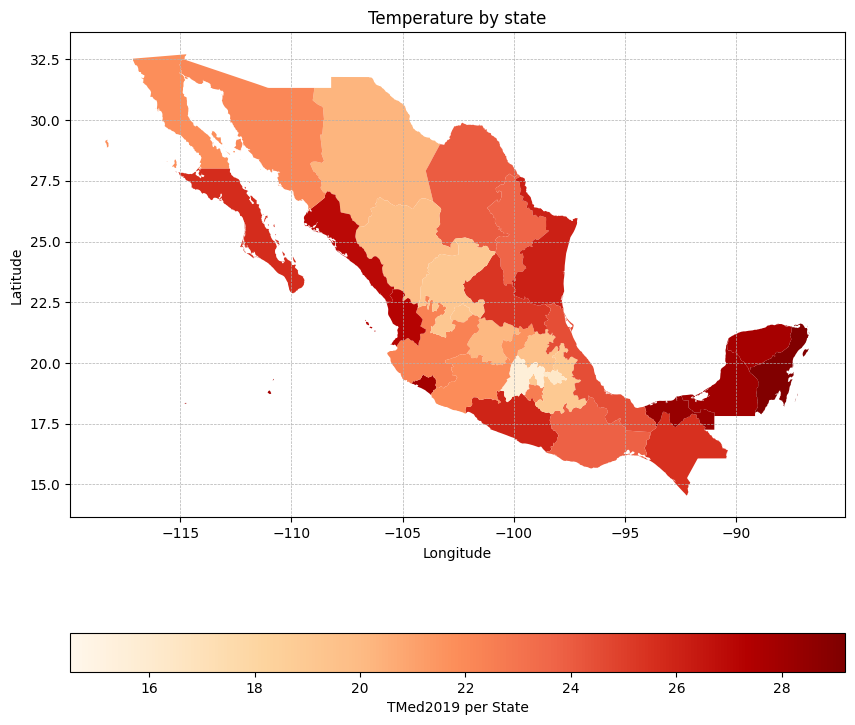

In [38]:
import matplotlib.pyplot as plt

merge.plot(column='TMed19', figsize=(10,10),
           legend_kwds={'label': "TMed2019 per State", 'orientation': "horizontal"}, legend=True, cmap='OrRd',vmin=14.5, vmax=29.2)

plt.grid(linestyle = '--', linewidth = 0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Temperature by state")
plt.savefig("TMed2019")


# Analisis por mes

Agrupar la tabla merge con los meses e identificador por estado

In [40]:
grouped2 = intersect.groupby(['id','state'])[cols].agg('mean')
grouped2.head()

,,TMed201901,TMed201902,TMed201903,TMed201905,TMed201906,TMed201907,TMed201908,TMed201909,TMed201910,TMed201911
id,state,,,,,,,,,,
1,Aguascalientes,13.950248,16.954167,19.008466,22.354274,23.252992,21.396892,21.143482,19.759091,18.835000,16.790909
2,Baja California,13.986667,12.079059,15.409804,20.089769,23.858095,26.335123,28.101815,25.250000,20.829167,17.752000
3,Baja California Sur,19.486194,18.203315,20.162467,22.161631,26.060944,29.233178,29.761968,28.203448,25.359091,22.539130
4,Campeche,23.166608,26.493556,26.825480,31.038441,29.874994,28.934082,29.245441,28.682609,28.154545,25.872727
5,Chiapas,21.894599,24.753430,25.290404,27.729959,26.549948,26.225515,26.707696,26.208621,25.761111,24.733333


In [41]:
dfAñoMes2019 = pd.merge(merge, grouped2, on="id")
dfAñoMes2019

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry,...,TMed201901,TMed201902,TMed201903,TMed201905,TMed201906,TMed201907,TMed201908,TMed201909,TMed201910,TMed201911
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908...",...,13.950248,16.954167,19.008466,22.354274,23.252992,21.396892,21.143482,19.759091,18.835000,16.790909
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774...",...,13.986667,12.079059,15.409804,20.089769,23.858095,26.335123,28.101815,25.250000,20.829167,17.752000
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028...",...,19.486194,18.203315,20.162467,22.161631,26.060944,29.233178,29.761968,28.203448,25.359091,22.539130
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ...",...,23.166608,26.493556,26.825480,31.038441,29.874994,28.934082,29.245441,28.682609,28.154545,25.872727
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ...",...,21.894599,24.753430,25.290404,27.729959,26.549948,26.225515,26.707696,26.208621,25.761111,24.733333
5,6,Chihuahua,Chihuahua,15.2,10.22,34.16,53.92,85.10,1.70,"MULTIPOLYGON (((-108.13750 31.77754, -108.1116...",...,10.502981,12.856257,16.398845,21.965385,26.253701,26.288179,25.831539,22.993103,19.017308,15.086000
6,7,Coahuila,Coahuila de Zaragoza,5.7,6.24,35.01,57.73,106.05,1.02,"MULTIPOLYGON (((-102.27618 29.86955, -102.2582...",...,13.054883,17.059673,18.581620,26.376539,28.275971,28.558568,30.459302,27.361111,22.903030,17.524242
7,8,Colima,Colima,21.0,13.36,18.30,67.89,76.49,0.45,"MULTIPOLYGON (((-114.73404 18.32925, -114.7405...",...,25.657873,25.518487,26.235408,26.790101,29.333591,28.998864,28.996457,28.394118,27.794118,27.911765
8,9,Distrito Federal,Distrito Federal,4.8,0.68,16.48,80.72,172.88,2.12,"MULTIPOLYGON (((-98.96395 19.08912, -98.97687 ...",...,15.433826,18.109671,19.178638,21.323173,20.037865,18.863344,19.800893,19.395455,19.073913,17.921053
9,10,Durango,Durango,17.4,16.62,25.77,56.25,67.61,1.36,"MULTIPOLYGON (((-105.75610 26.69129, -105.7295...",...,12.734550,15.504173,17.493057,21.063053,24.510277,23.444025,23.984939,21.531481,19.805556,15.965455


In [42]:
dfAñoMes2019.to_csv('TempMexAñoMes2019.csv',index=False)